In [27]:
library(leaflet)
library(stringr)
library(plyr)
library(ggplot2)

movies <- read.csv("combined.csv")
movies

X,Name,Year,genre,release,time,Certificates,Ratings
<int>,<fct>,<int>,<fct>,<fct>,<dbl>,<fct>,<dbl>
0,$ (1971),1971,Comedy,15 December 1971,121,R,6.4
1,$ (1971),1971,Comedy,22 December 1971,121,R,6.4
2,$ (1971),1971,Crime,15 December 1971,121,R,6.4
3,$ (1971),1971,Crime,22 December 1971,121,R,6.4
4,$ (1971),1971,Drama,15 December 1971,121,R,6.4
5,$ (1971),1971,Drama,22 December 1971,121,R,6.4
6,$10 Raise (1935),1935,Comedy,4 May 1935,70,Approved,7.1
7,$10 Raise (1935),1935,Comedy,4 May 1935,70,Passed,7.1
8,$10 Raise (1935),1935,Drama,4 May 1935,70,Approved,7.1


In [47]:
movies3 <- movies
#at$Record <- as.character(at$Record)


movies3$release <- as.character(movies3$release)
movies3$release <- as.POSIXct(x=movies3$release, format = "%d %B %Y")



movies3
#movies3$release <- as.POSIXct(x=movies3$release, format = "%d%month%Y")
#movies3

X,Name,Year,genre,release,time,Certificates,Ratings
<int>,<fct>,<int>,<fct>,<dttm>,<dbl>,<fct>,<dbl>
0,$ (1971),1971,Comedy,1971-12-15,121,R,6.4
1,$ (1971),1971,Comedy,1971-12-22,121,R,6.4
2,$ (1971),1971,Crime,1971-12-15,121,R,6.4
3,$ (1971),1971,Crime,1971-12-22,121,R,6.4
4,$ (1971),1971,Drama,1971-12-15,121,R,6.4
5,$ (1971),1971,Drama,1971-12-22,121,R,6.4
6,$10 Raise (1935),1935,Comedy,1935-05-04,70,Approved,7.1
7,$10 Raise (1935),1935,Comedy,1935-05-04,70,Passed,7.1
8,$10 Raise (1935),1935,Drama,1935-05-04,70,Approved,7.1


X,Name,Year,genre,Month,time,Certificates,Ratings
<int>,<fct>,<int>,<fct>,<chr>,<dbl>,<fct>,<dbl>
0,$ (1971),1971,Comedy,December,121,R,6.4
1,$ (1971),1971,Comedy,December,121,R,6.4
2,$ (1971),1971,Crime,December,121,R,6.4
3,$ (1971),1971,Crime,December,121,R,6.4
4,$ (1971),1971,Drama,December,121,R,6.4
5,$ (1971),1971,Drama,December,121,R,6.4
6,$10 Raise (1935),1935,Comedy,May,70,Approved,7.1
7,$10 Raise (1935),1935,Comedy,May,70,Passed,7.1
8,$10 Raise (1935),1935,Drama,May,70,Approved,7.1


Month,Freq
<fct>,<int>
April,13121
August,9635
December,10374
February,8445
January,9872
July,8975
June,11397
March,11247
May,9966


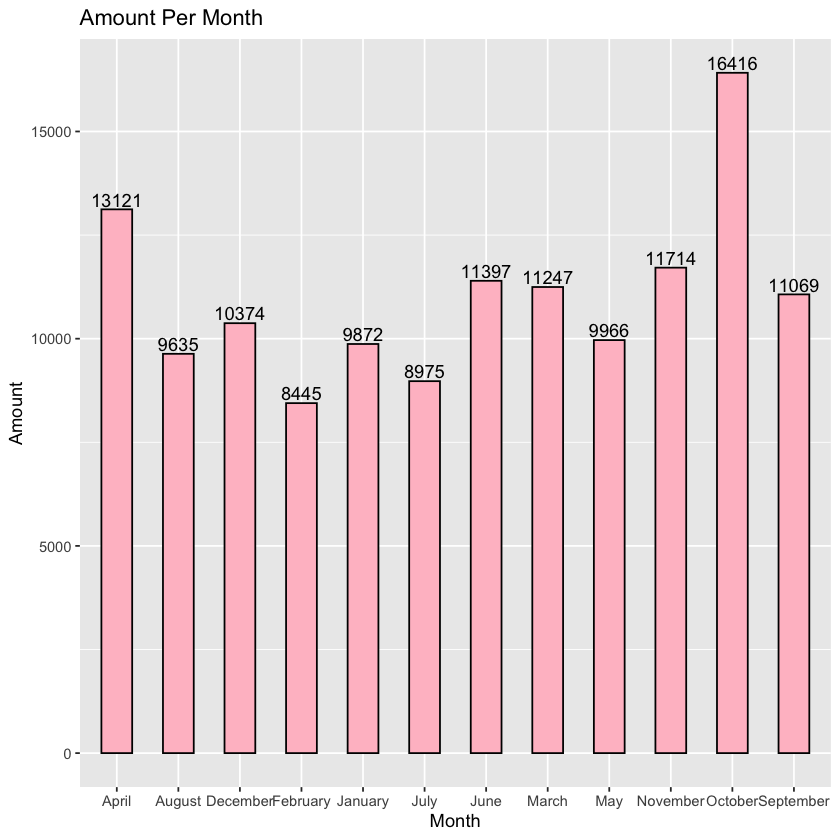

In [69]:
onlymonth <- movies3
onlymonth$release <- format(as.Date(onlymonth$release), "%B")
onlymonth$release <- as.character(onlymonth$release)
names(onlymonth)[5] = "Month"
onlymonth
onlymonthtable <- table(a<-(onlymonth$Month))
onlymonthtable <- as.data.frame(onlymonthtable)
names(onlymonthtable)[1] = "Month"
onlymonthtable

plot6 <- ggplot(data= onlymonthtable, aes(x=Month, y=Freq)) + 
    geom_bar(stat="identity", width=.5, color="black", fill="pink") + 
    ggtitle("Amount Per Month") +
    labs(x = "Month", y = "Amount") +
    geom_text(aes(label = Freq), position=position_dodge(width=.9), vjust=-.25)
plot6

In [76]:
averagemonth <- onlymonthtable
averagemonth

averagemonth$Freq <- lapply(averagemonth$Freq, function(x){
   x <- x / 132231
    
})
averagemonth

Month,Freq
<fct>,<int>
April,13121
August,9635
December,10374
February,8445
January,9872
July,8975
June,11397
March,11247
May,9966


Month,Freq
<fct>,<list>
April,0.09922787
August,0.07286491
December,0.07845362
February,0.06386551
January,0.07465723
July,0.06787365
June,0.08619008
March,0.0850557
May,0.07536811


In [ ]:
#movies3$release <- lapply(movies3$release, function(x){
#    if (x != "NA"){
#       x <- as.Date(x=movies3$release, format = "%d%month%Y")
#    }
#    else{
#        x <-x
 #   }
#    
#})

Var1,Freq
<fct>,<int>
1915,15
1916,3
1917,4
1920,26
1921,12
1922,5
1923,21
1924,57
1925,33


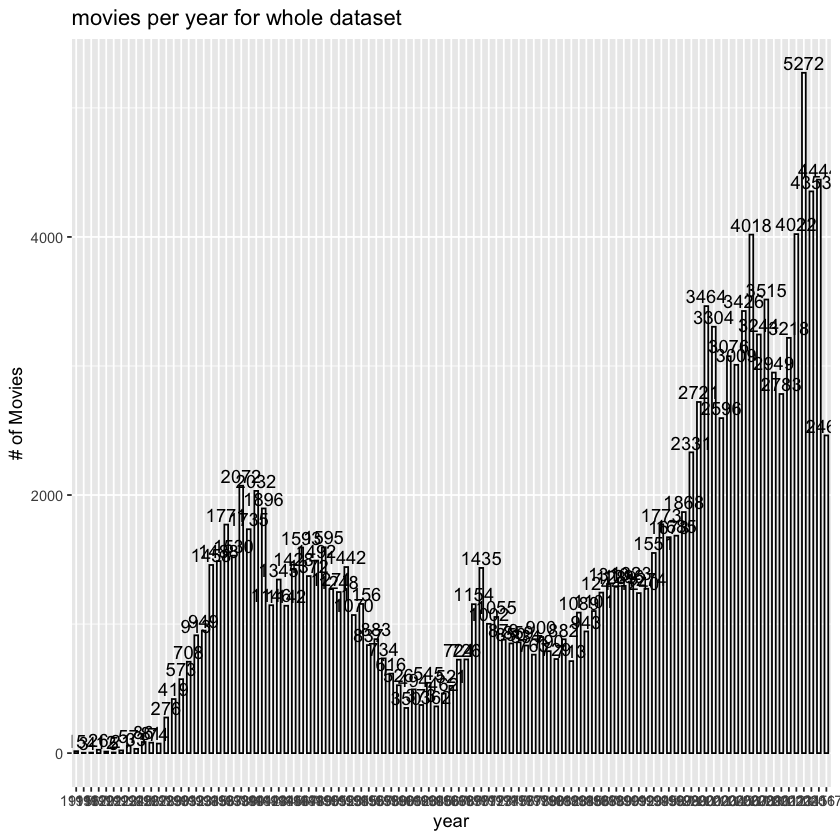

In [20]:
#number of movies per year
moviesperyear <- table(a<-(movies$Year))
moviesperyear <- as.data.frame(moviesperyear)
moviesperyear

plot2 <- ggplot(data= moviesperyear, aes(x=Var1, y=Freq)) + 
    geom_bar(stat="identity", width=.5, color="black", fill="white") + 
    ggtitle("movies per year for whole dataset") +
    labs(x = "year", y = "# of Movies") +
    geom_text(aes(label = Freq), position=position_dodge(width=.9), vjust=-.25)
plot2



Var1,Freq
<fct>,<int>
Action,7613
Adventure,6581
Animation,1451
Biography,3289
Comedy,17995
Crime,8912
Documentary,2602
Drama,31364
Family,3245


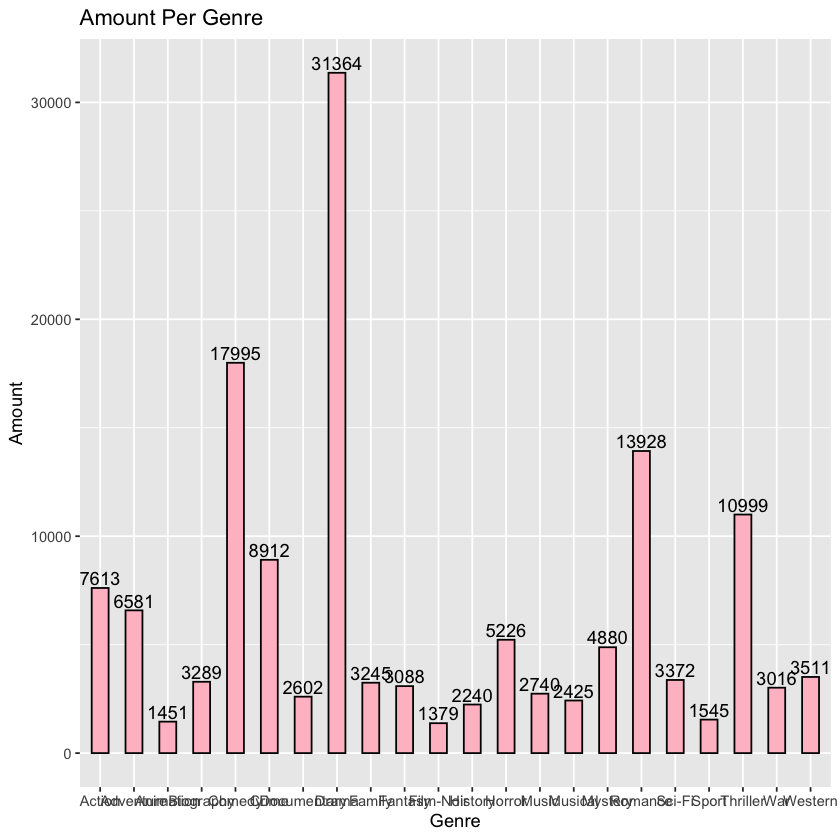

In [24]:
genreAmount <- table(a<-(movies$genre))
genreAmount <- as.data.frame(genreAmount)
genreAmount

plot3 <- ggplot(data= genreAmount, aes(x=Var1, y=Freq)) + 
    geom_bar(stat="identity", width=.5, color="black", fill="pink") + 
    ggtitle("Amount Per Genre") +
    labs(x = "Genre", y = "Amount") +
    geom_text(aes(label = Freq), position=position_dodge(width=.9), vjust=-.25)
plot3

Var1,Freq
<fct>,<int>
,5
AO,2
Approved,27600
ApprovedCertificate #17398),20
G,5546
G,6
GP,840
GRe-Issue from 1964,20
Open,8


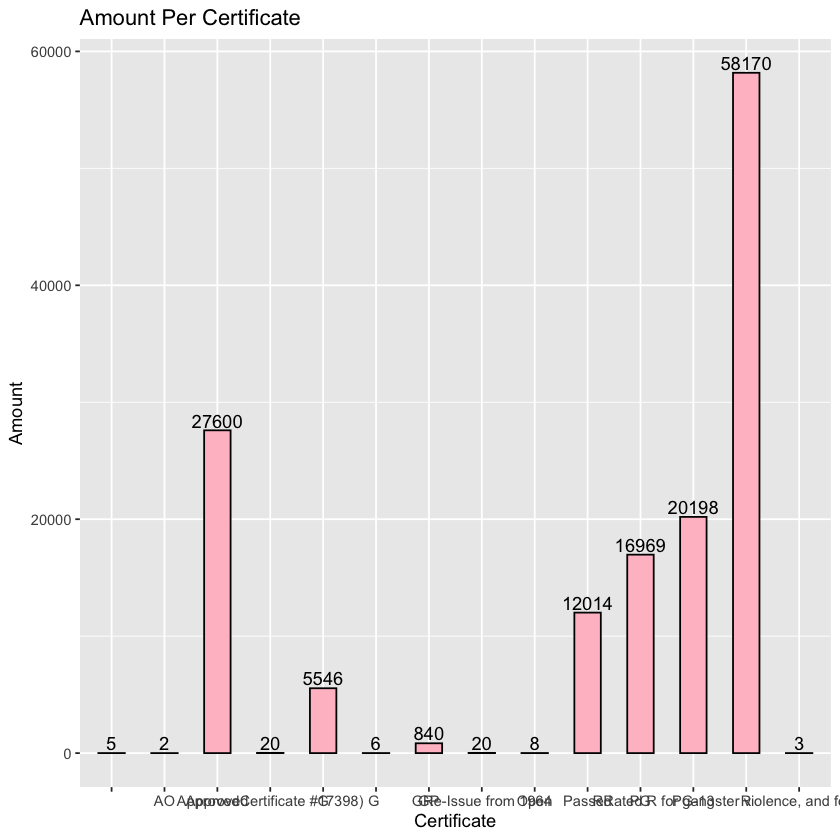

In [40]:
certificateAmount <- table(a<-(movies$Certificates))
certificateAmount <- as.data.frame(certificateAmount)
certificateAmount

plot4 <- ggplot(data= certificateAmount, aes(x=Var1, y=Freq)) + 
    geom_bar(stat="identity", width=.5, color="black", fill="pink") + 
    ggtitle("Amount Per Certificate") +
    labs(x = "Certificate", y = "Amount") +
    geom_text(aes(label = Freq), position=position_dodge(width=.9), vjust=-.25)
plot4

Var1,Freq
<fct>,<int>
60,1310
61,1025
62,844
63,975
64,890
65,1197
66,852
67,899
68,912


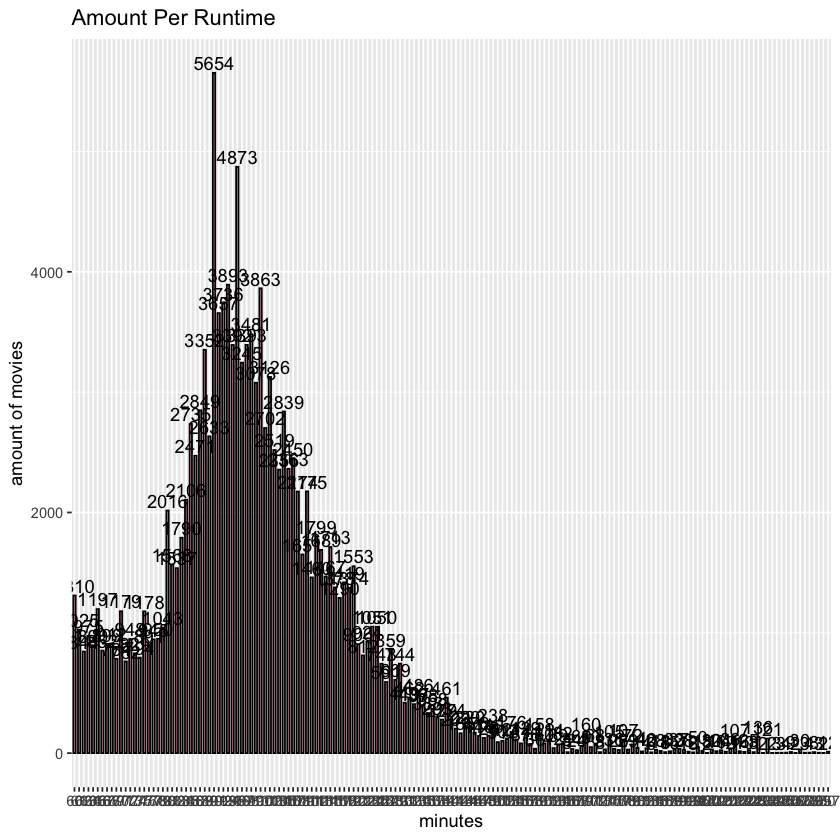

In [42]:
runtimeAmount <- table(a<-(movies$time))
runtimeAmount <- as.data.frame(runtimeAmount)
runtimeAmount
plot5 <- ggplot(data= runtimeAmount, aes(x=Var1, y=Freq)) + 
    geom_bar(stat="identity", width=.5, color="black", fill="pink") + 
    ggtitle("Amount Per Runtime") +
    labs(x = "minutes", y = "amount of movies") +
    geom_text(aes(label = Freq), position=position_dodge(width=.9), vjust=-.25)
plot5